IMPORT MODULES

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import functions
import scipy.integrate
import scipy.optimize
import scipy.stats

CONSTANTS

In [7]:
global m_0, c
#H_0 = 75 * 10**3 / (3.086*10**22) # s^-1
m_0 = -20.45
c = 299792458 # m/s

READ DATA

In [8]:
#reads data
name, redshift, distance_modulus, dm_err = functions.read_data('sn_data_extended.txt')

DoF = 174
Optimised parameters =  [0.07073886] 

Covariance matrix = 
 [[1.5765004e-07]]


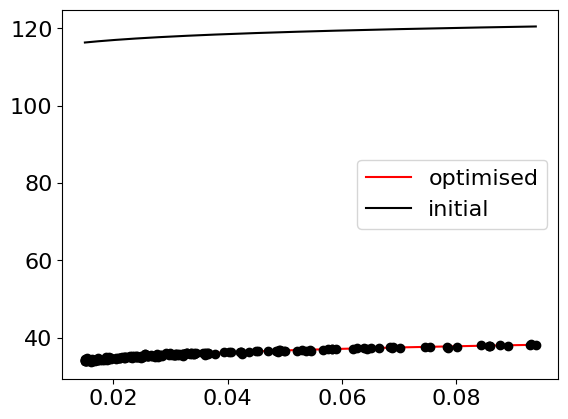

chi^2_min = 171.26729239918515
reduced chi^2 = 0.9842947839033629
$P(chi^2_min, DoF)$ = 0.5443776274627189


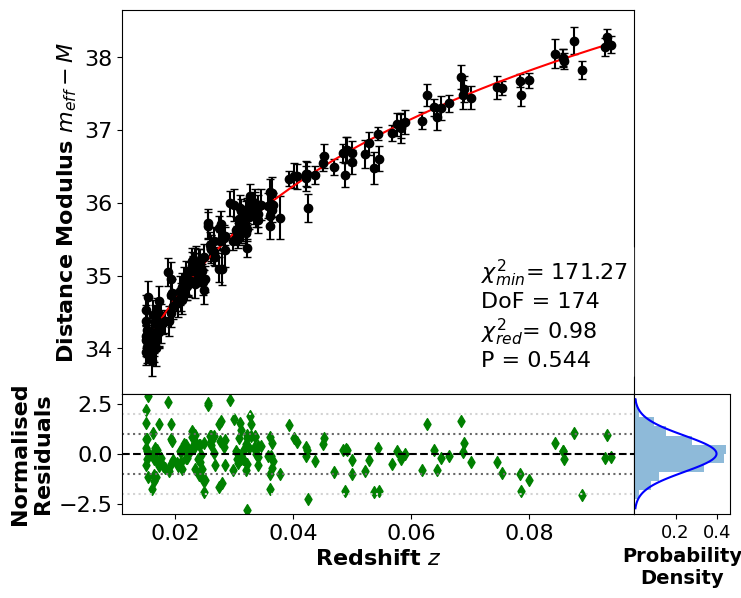

optimised parameter[0] = 0.07073885656656098 +/- 0.00039705168416757523
0.07073885656656098
0.00039705168416757523


In [9]:
#chi squared fitting
low_redshift_indices = np.where(redshift<0.1)[0]

xval = redshift[low_redshift_indices]
yval = distance_modulus[low_redshift_indices]
yerr = dm_err[low_redshift_indices]

def model_funct(x, *vals):
    return 5*np.log10((1+x)*c*x/vals[0]) - 5

initial = np.array([75.0 * 10**3 / (3.086*10**22)]) # Initial guess for fit parameters

plt.rcParams.update({'font.size': 16})

parameters = functions.automated_curve_fitting(xval, yval, yerr, model_funct, initial,
                                               xlabel = 'Redshift $z$', 
                                               ylabel = 'Distance Modulus $m_{eff} - M$') #optimised parameters given in erg/s/Ang
H_0 = parameters[0][0] #* 10**-3 * 10**6
H_0_err = parameters[1][0] #* 10**-3 * 10**6

print(H_0)
print(H_0_err)

Calculate Ω_Λ,0